In [1]:
# Iron Electronegativy

# Good video explaining ionization energy and electronegativity https://www.youtube.com/watch?v=R2ricK9HXs8

fe = 1.83

#26 Fe iron: https://en.wikipedia.org/wiki/Ionization_energies_of_the_elements_(data_page)
#use 	762.5 	1561.9 	2957 	5290 	7240 	9560 	12060 	14580 	22540 	25290 	28000 	31920 	34830 	37840 	44100 	47206 	122200 	131000 	140500 	152600 	163000 	173600 	188100 	195200 	851800 	895161
#WEL 	762.5 	1561.9 	2957 	5290 	7240 	9560 	12060 	14580 	22540 	25290 	28000 	31920 	34830 	37840 	44100 	47206 	122200 	131000 	140500 	152600 	163000
#CRC 	7.9024 	16.1878 	30.652 	54.8 	75.0 	99.1 	124.98 	151.06 	233.6 	262.1 	290.2 	330.8 	361.0 	392.2 	457 	489.256 	1266 	1358 	1456 	1582 	1689 	1799 	1950 	2023 	8828 	9277.69

# First Ionization Energy of Iron is 7.9024 eV.
fe1 = 7.9024
fe2 = 16.1878
fe3 = 30.652

#17 Cl chlorine
#use 	1251.2 	2298 	3822 	5158.6 	6542 	9362 	11018 	33604 	38600 	43961 	51068 	57119 	63363 	72341 	78095 	352994 	380760
#WEL 	1251.2 	2298 	3822 	5158.6 	6542 	9362 	11018 	33604 	38600 	43961
#CRC 	12.96764 	23.814 	39.61 	53.4652 	67.8 	97.03 	114.1958 	348.28 	400.06 	455.63 	529.28 	591.99 	656.71 	749.76 	809.40 	3658.521 	3946.2960

cl1 = 12.96764



In [5]:
import psi4

# Set memory and output
psi4.set_memory('2 GB')
psi4.set_num_threads(2)

# Set Iron Molecule
iron = psi4.molecule("""
    pubchem:23925
""")

# Iron II (Fe2+)
iron_ii = psi4.molecule("""
    pubchem:27284
""")

# Iron III (Fe3+)
iron_iii = psi4.molecule("""
    pubchem:29936
""")

# Chlorine I (Cl-)
chlorine_i = psi4.molecule("""
    pubchem:312
""")


ModuleNotFoundError: No module named 'psi4'

,Fe3 (M),Fe2 (M),Elhs (V),Erhs (V),Eo (V)
1.9,0.1,1.9,-0.440,0.761,1.201
1.8,0.2,1.8,-0.440,0.766,1.206
1.7,0.3,1.7,-0.440,0.767,1.207
1.6,0.4,1.6,-0.440,0.768,1.208
1.5,0.5,1.5,-0.440,0.769,1.209
1.4,0.6,1.4,-0.440,0.769,1.209
1.3,0.7,1.3,-0.440,0.769,1.209
1.2,0.8,1.2,-0.440,0.769,1.210
1.1,0.9,1.1,-0.440,0.769,1.210
1.0,1.0,1.0,-0.440,0.770,1.210


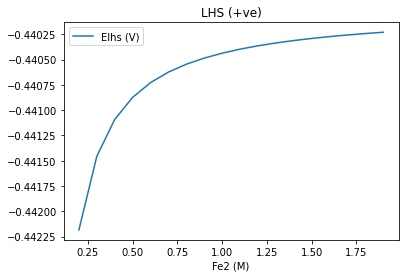

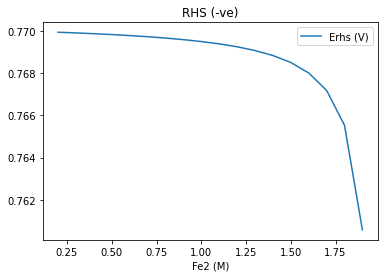

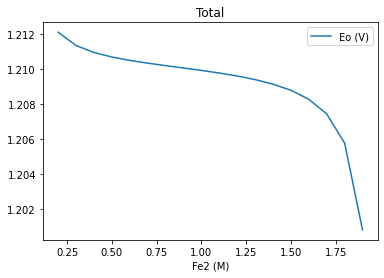

In [9]:
from numpy import arange
from pandas import DataFrame
from chempy.electrochemistry.nernst import nernst_potential

T = 273 + 45 # 45C in K
frame = DataFrame(columns=['Fe3 (M)', 'Fe2 (M)', 'Elhs (V)', 'Erhs (V)', 'Eo (V)'])
# Start with 2M FeCl2 and convert to FeCl3
# LHS (+ve): FeCl2 + 2e- -> Fe + 2Cl-
# RHS (-ve): 2FeCl2 + 2Cl- -> 2FeCl3 + 2e-
for lhs_fecl2 in arange(1.9, 0.1, -0.1):
   fecl2 = 2 - lhs_fecl2
   fecl3 = lhs_fecl2
   rhs = 0.77 + nernst_potential(1, T, fecl2, fecl3)
   lhs = -0.44 + nernst_potential(2, T, lhs_fecl2, 1)
   frame.loc[lhs_fecl2] = [fecl2, fecl3, lhs, rhs, rhs - lhs]
   
frame.plot(x='Fe2 (M)', y='Elhs (V)', kind='line', title='LHS (+ve)')
frame.plot(x='Fe2 (M)', y='Erhs (V)', kind='line', title='RHS (-ve)')
frame.plot(x='Fe2 (M)', y='Eo (V)', kind='line', title='Total')
round(frame, 3)